In [24]:
#importing all necessary libraries
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load all CSV files
odi_df = pd.read_csv("odi_ball_by_ball.csv")
t20_df = pd.read_csv("t20_ball_by_ball.csv")
test_df = pd.read_csv("test_ball_by_ball.csv")
ipl_df = pd.read_csv("ipl_ball_by_ball.csv")
odi_sum = pd.read_csv("odi_match_summary.csv")
t20_sum = pd.read_csv("t20_match_summary.csv")
test_sum = pd.read_csv("test_match_summary.csv")
ipl_sum = pd.read_csv("ipl_match_summary.csv")

In [4]:
# Combine all dataframes
combined_df = pd.concat([odi_df, t20_df, test_df, ipl_df], ignore_index=True)

C:\Users\Deepika Devi A\AppData\Local\Temp\ipykernel_17736\70634552.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batters, x="runs_batter", y="batter", palette="magma")


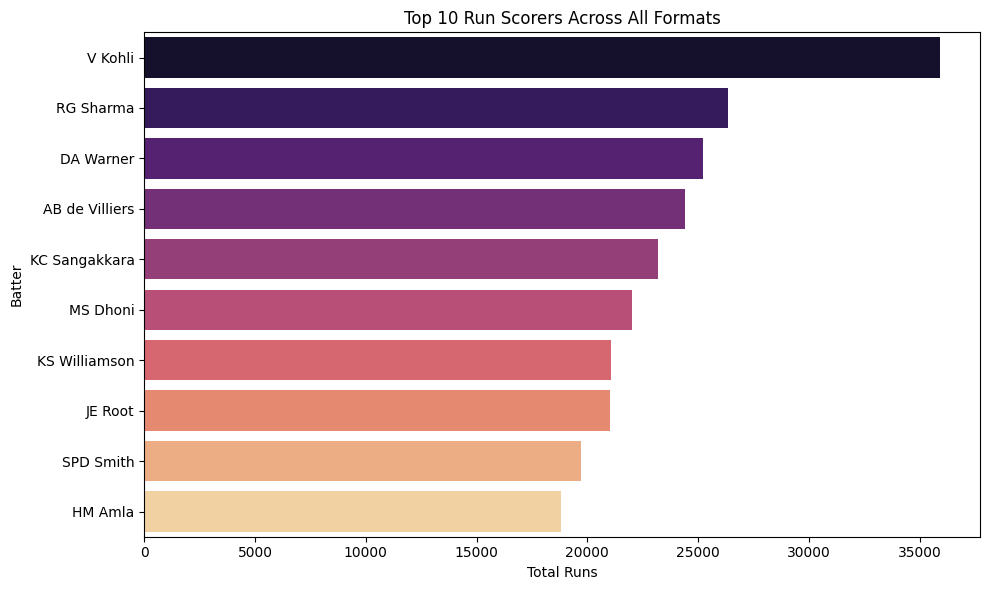

In [ ]:
#Top 10 Run Scorers Across All Formats

# Group by batter and calculate total runs
top_batters = (
    combined_df.groupby("batter")["runs_batter"]
    .sum()
    .reset_index()
    .sort_values(by="runs_batter", ascending=False)
    .head(10)
)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=top_batters, x="runs_batter", y="batter", palette="magma")
plt.title("Top 10 Run Scorers Across All Formats")
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.tight_layout()
plt.show()

C:\Users\Deepika Devi A\AppData\Local\Temp\ipykernel_17736\436265312.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_wicket_takers, x="total_wickets", y="bowler", palette="rocket")


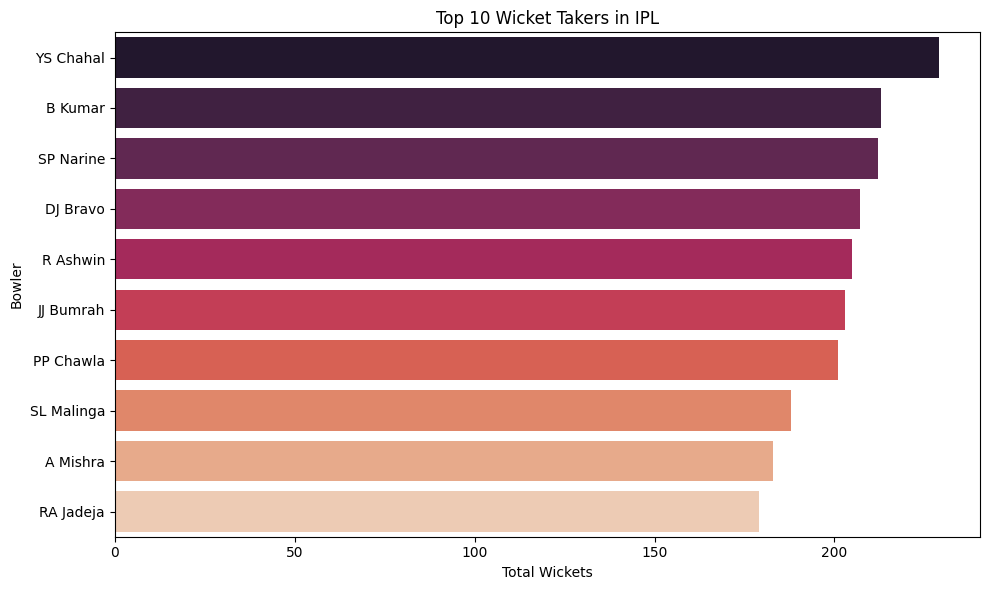

In [ ]:
#Top 10 Wicket Takers in IPL
# Filter valid wicket types (exclude 'NA', 'run out', etc.)
valid_wickets = ipl_df[
    ~ipl_df["wicket_kind"].isin(["NA", "nan", "retired out","run out" "retired hurt", "obstructing the field"])
]

# Group by bowler and count wickets
top_wicket_takers = (
    valid_wickets.groupby("bowler")["wicket_kind"]
    .count()
    .reset_index()
    .rename(columns={"wicket_kind": "total_wickets"})
    .sort_values(by="total_wickets", ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_wicket_takers, x="total_wickets", y="bowler", palette="rocket")
plt.title("Top 10 Wicket Takers in IPL")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()

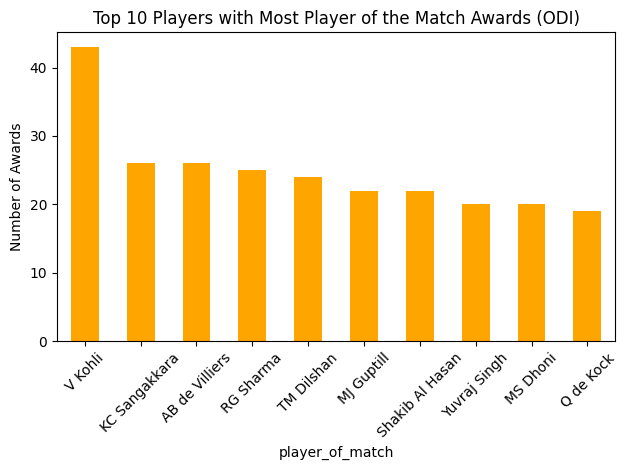

In [ ]:
#Top 10 Players with Most Player of the Match Awards (ODI)

potm_counts = odi_sum['player_of_match'].value_counts().head(10)
potm_counts.plot(kind='bar', color='orange')
plt.title("Top 10 Players with Most Player of the Match Awards (ODI)")
plt.ylabel("Number of Awards")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

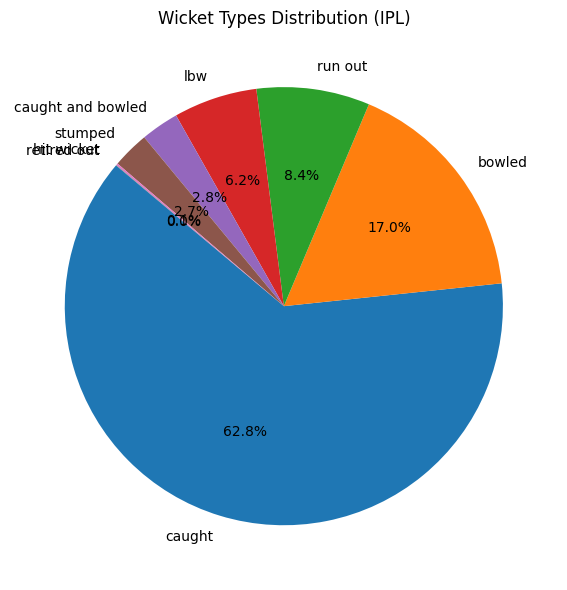

In [ ]:
#Wicket Types Distribution (IPL)

# Filter valid wicket types
valid_wickets = ipl_df[
    ~ipl_df['wicket_kind'].isin(['NA', 'nan', 'retired', 'retired hurt', 'obstructing the field'])
]

# Count each type of wicket
wicket_counts = valid_wickets['wicket_kind'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(wicket_counts, labels=wicket_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Wicket Types Distribution (IPL)")
plt.tight_layout()
plt.show()

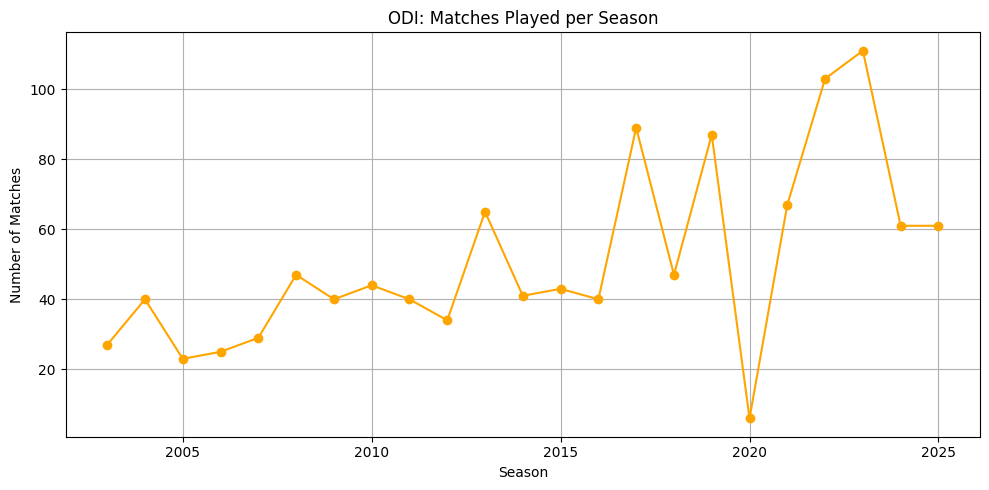

In [ ]:
#ODI: Matches Played per Season
# Make sure 'season' column is present and numeric
odi_sum['season'] = pd.to_numeric(odi_sum['season'], errors='coerce')

# Count number of matches per season
odi_season_trend = odi_sum['season'].value_counts().sort_index()

# Plot the line graph
plt.figure(figsize=(10, 5))
plt.plot(odi_season_trend.index, odi_season_trend.values, marker='o', linestyle='-', color='orange')
plt.title("ODI: Matches Played per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Deepika Devi A\AppData\Local\Temp\ipykernel_17736\2016854581.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl_filtered['toss_win_match_win'] = ipl_filtered.apply(


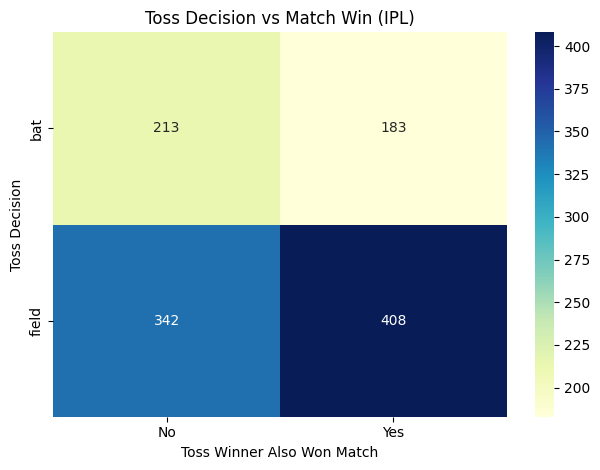

In [ ]:
#Toss Decision vs Match Win (IPL)

# Filter out rows with missing winners or toss_winners
ipl_filtered = ipl_sum[~ipl_sum['winner'].isin(['NA', 'No Result', 'nan']) & 
                       ~ipl_sum['toss_winner'].isin(['NA', 'No Result', 'nan'])]

# Create a new column whether toss winner also won the match
ipl_filtered['toss_win_match_win'] = ipl_filtered.apply(
    lambda row: 'Yes' if row['toss_winner'] == row['winner'] else 'No', axis=1
)

# Create crosstab of toss decision and match outcome
heatmap_data = pd.crosstab(ipl_filtered['toss_decision'], ipl_filtered['toss_win_match_win'])

# Plot heatmap
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Toss Decision vs Match Win (IPL)')
plt.xlabel('Toss Winner Also Won Match')
plt.ylabel('Toss Decision')
plt.tight_layout()
plt.show()

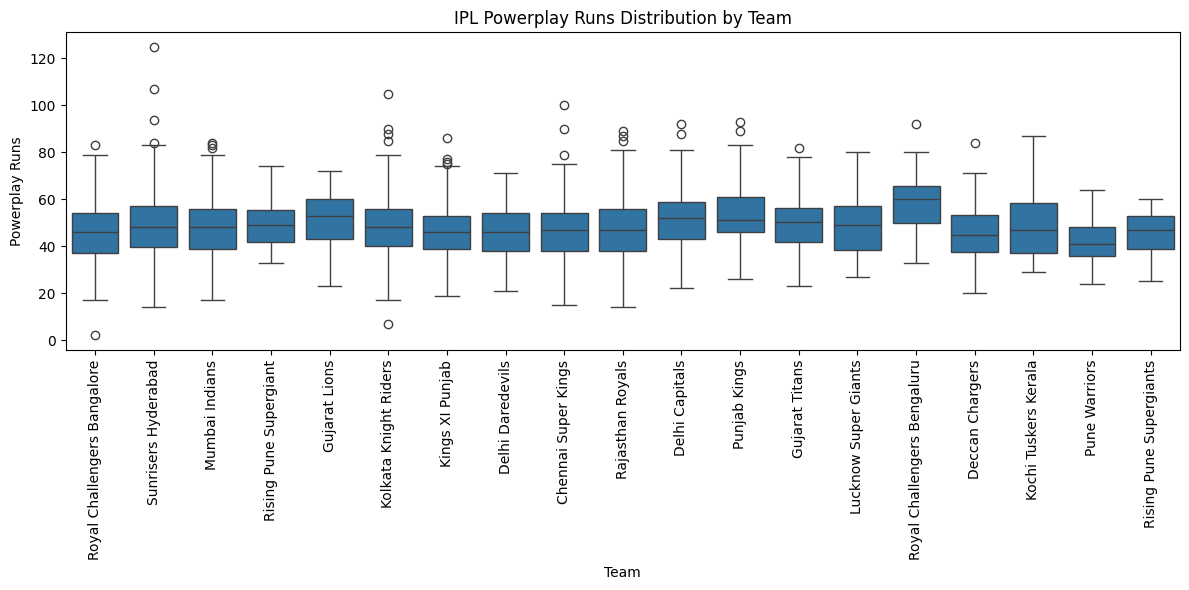

In [ ]:
# IPL Powerplay Runs Distribution by Team

powerplay_df = ipl_df[ipl_df['over_number'] < 6]

# Group by match and batting team to sum total runs in powerplay
powerplay_runs = powerplay_df.groupby(['match_id', 'inning_team'])['runs_total'].sum().reset_index()
powerplay_runs.rename(columns={'runs_total': 'powerplay_runs'}, inplace=True)

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=powerplay_runs, x='inning_team', y='powerplay_runs')
plt.xticks(rotation=90)
plt.title('IPL Powerplay Runs Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Powerplay Runs')
plt.tight_layout()
plt.show()


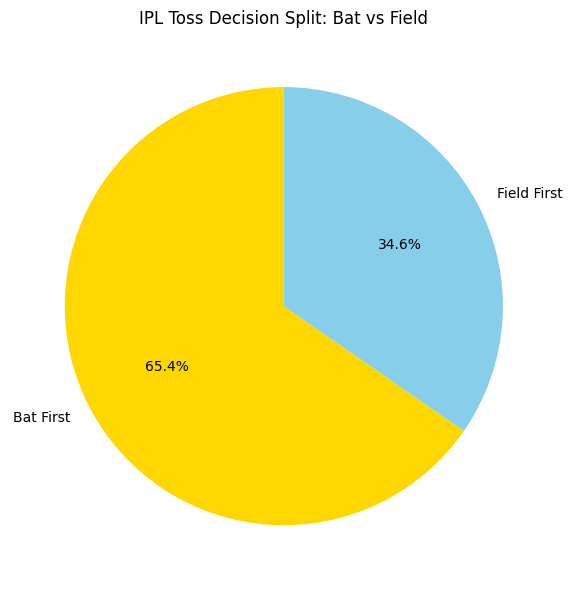

In [ ]:
#IPL Toss Decision Split: Bat First vs Field First

toss_decision_counts = ipl_sum['toss_decision'].value_counts()

# Pie Chart
plt.figure(figsize=(6, 6))
colors = ['#FFD700', '#87CEEB'] 
toss_decision_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=['Bat First', 'Field First']
)

plt.title('IPL Toss Decision Split: Bat vs Field')
plt.ylabel('')
plt.tight_layout()
plt.show()

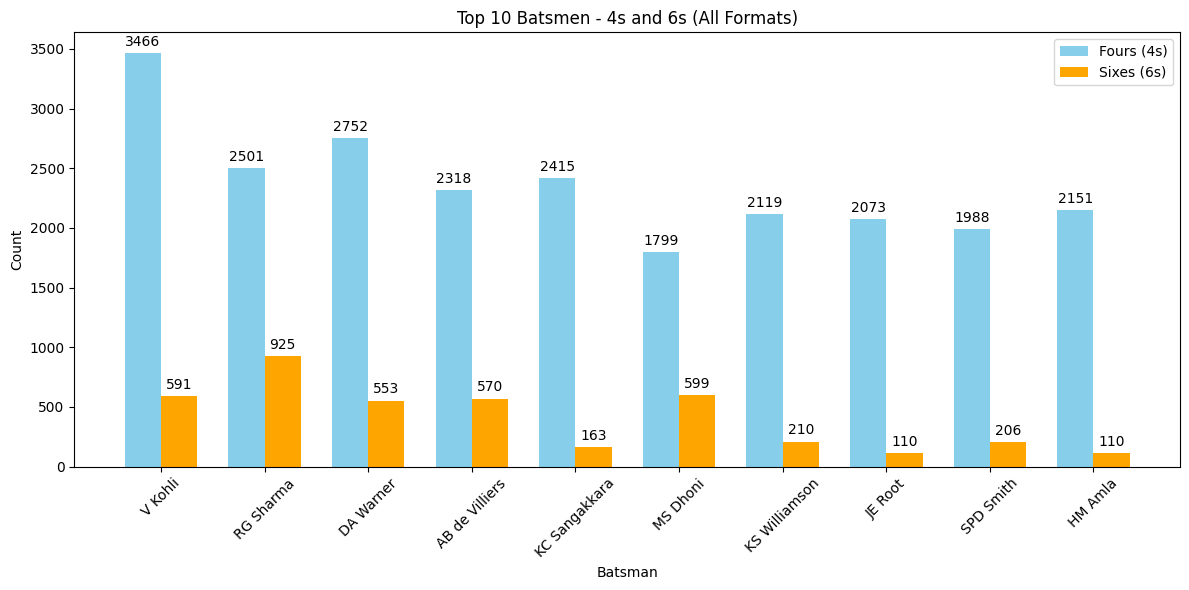

In [ ]:
#Top 10 Batsmen: Number of Fours and Sixes Across All Formats
# Combine all formats into one DataFrame
combined_df = pd.concat([odi_df, t20_df, test_df, ipl_df], ignore_index=True)

# Filter out invalid rows (e.g. NA, nan, etc.) if necessary
combined_df = combined_df[combined_df['runs_batter'].notna()]

# Group by batter and calculate total runs, 4s and 6s
batsman_stats = combined_df.groupby('batter').agg(
    total_runs=('runs_batter', 'sum'),
    total_4s=('runs_batter', lambda x: (x == 4).sum()),
    total_6s=('runs_batter', lambda x: (x == 6).sum())
).reset_index()

# Get Top 10 batters by total runs
top_10_batters = batsman_stats.sort_values(by='total_runs', ascending=False).head(10)

# X-axis positions
x = np.arange(len(top_10_batters['batter']))
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for 4s and 6s
bars1 = ax.bar(x - width/2, top_10_batters['total_4s'], width, label='Fours (4s)', color='skyblue')
bars2 = ax.bar(x + width/2, top_10_batters['total_6s'], width, label='Sixes (6s)', color='orange')

# Add labels and title
ax.set_xlabel('Batsman')
ax.set_ylabel('Count')
ax.set_title('Top 10 Batsmen - 4s and 6s (All Formats)')
ax.set_xticks(x)
ax.set_xticklabels(top_10_batters['batter'], rotation=45)
ax.legend()

# Add value labels on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()



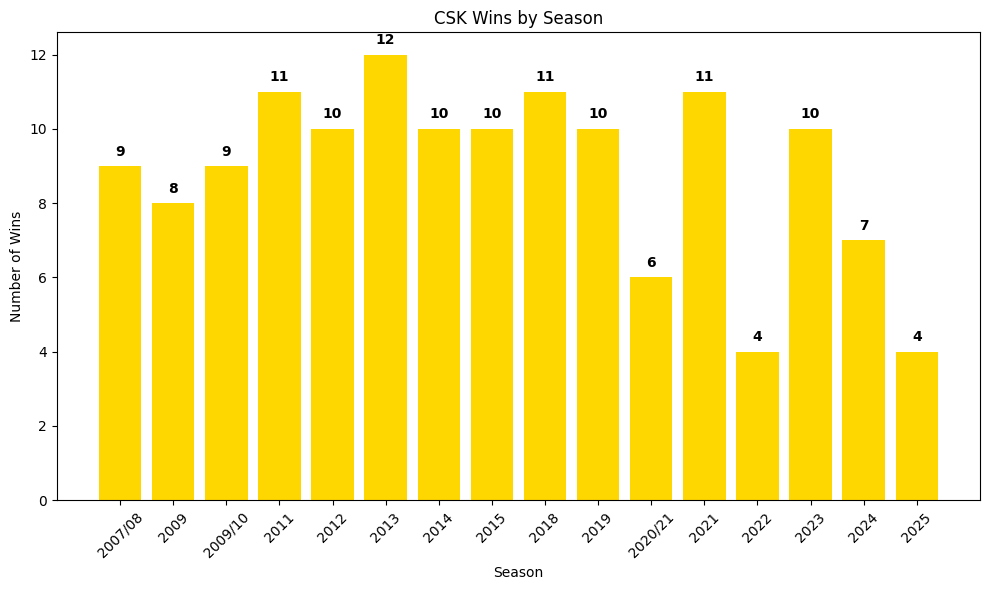

In [ ]:
# CSK IPL Wins by Season
csk_matches = ipl_sum[(ipl_sum['team_1'] == 'Chennai Super Kings') | (ipl_sum['team_2'] == 'Chennai Super Kings')]
csk_wins = csk_matches[csk_matches['winner'] == 'Chennai Super Kings']

# Count wins by season
wins_by_season = csk_wins['season'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(wins_by_season.index.astype(str), wins_by_season.values, color='gold')
plt.title("CSK Wins by Season")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height() 
    plt.text(
        bar.get_x() + bar.get_width()/2,  
        yval + 0.2,                        
        int(yval),                         
        ha='center', va='bottom',         
        fontsize=10, fontweight='bold'    
    )

plt.tight_layout()
plt.show()
